# Project Guideline

Hi teman-teman! Silakan menggunakan template notebook ini untuk mengerjakan projectmu.

<br>

**Informasi tambahan,**
1. Copy notebook ini untuk mulai mengerjakan Projectmu.
2. Kamu bebas untuk menambahkan cell pada notebook.

## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Memasukkan library yang akan kamu gunakan

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from itertools import combinations

Mengambil file .csv dari Google Drive kamu.

In [114]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing_data.csv')

In [115]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.



> <b>Mencari nilai yang hilang<b>



In [116]:
missing = df.isnull().sum()
print("Nilai yang hilang :")
print(missing)

Nilai yang hilang :
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


> <b>Mencari Outlier dengan memakai metode IQR<b>



In [117]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    print(f"Jumlah outlier di kolom '{col}': {outlier_count}")

Jumlah outlier di kolom 'price': 15
Jumlah outlier di kolom 'area': 12
Jumlah outlier di kolom 'bedrooms': 12
Jumlah outlier di kolom 'bathrooms': 1
Jumlah outlier di kolom 'stories': 41
Jumlah outlier di kolom 'parking': 12




> <b>Menyiapkan variabel<b>



In [118]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})


In [119]:
le = LabelEncoder()
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

In [120]:
num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [121]:
df_cleaned = df.copy()

print("\nData setelah cleaning:")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
display(df_cleaned.head())
print(df_cleaned.describe())



Data setelah cleaning:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,0


              price          area      bedrooms     bathrooms       stories  \
count  5.450000e+02  5.450000e+02  5.450000e+02  5.450000e+02  5.450000e+02   
mean   2.085997e-16 -1.564498e-16 -1.825247e-16 -2.607496e-17 -1.303748e-16   
std    1.000919e+00  1.000919e+00  1.000919e+00  1.000919e+00  1.000919e+00   
min   -1.614327e+00 -1.614530e+00 -2.665004e+00 -5.701867e-01 -9.293967e-01   
25%   -7.153170e-01 -7.151451e-01 -1.308863e+00 -5.701867e-01 -9.293967e-01   
50%   -2.283534e-01 -2.539222e-01  4.727831e-02 -5.701867e-01  2.244101e-01   
75%    5.208214e-01  5.578300e-01  4.727831e-02  1.421812e+00  2.244101e-01   
max    4.566365e+00  5.096263e+00  4.115701e+00  5.405809e+00  2.532024e+00   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0

## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

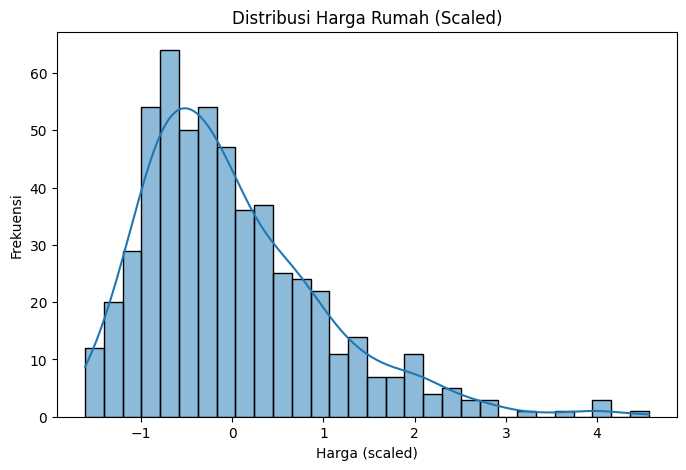

In [125]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribusi Harga Rumah (Scaled)')
plt.xlabel('Harga (scaled)')
plt.ylabel('Frekuensi')
plt.show()

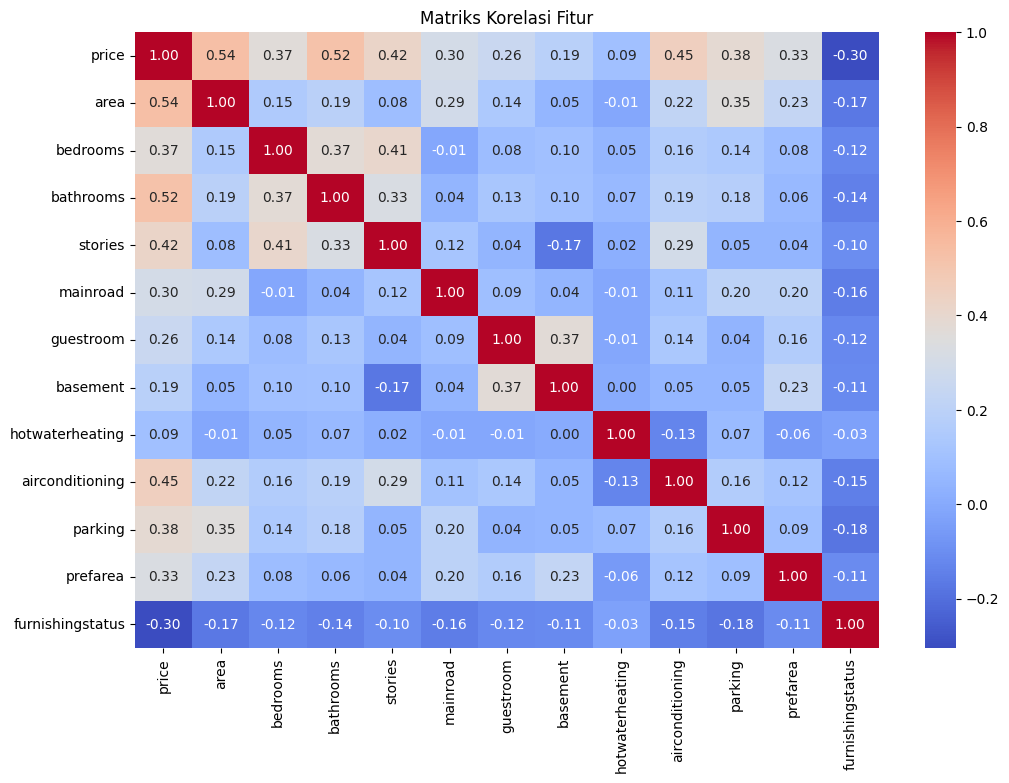

In [123]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriks Korelasi Fitur')
plt.show()

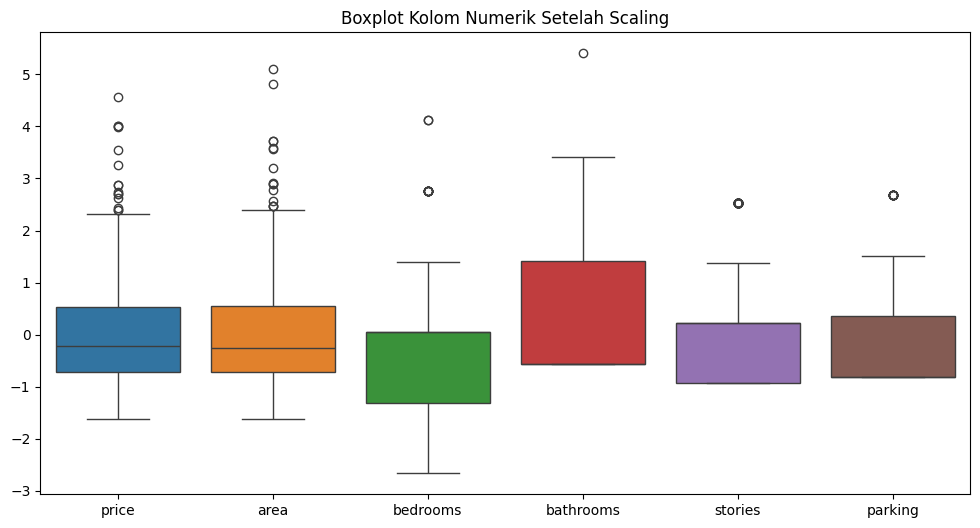

In [126]:
num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title('Boxplot Kolom Numerik Setelah Scaling')
plt.show()

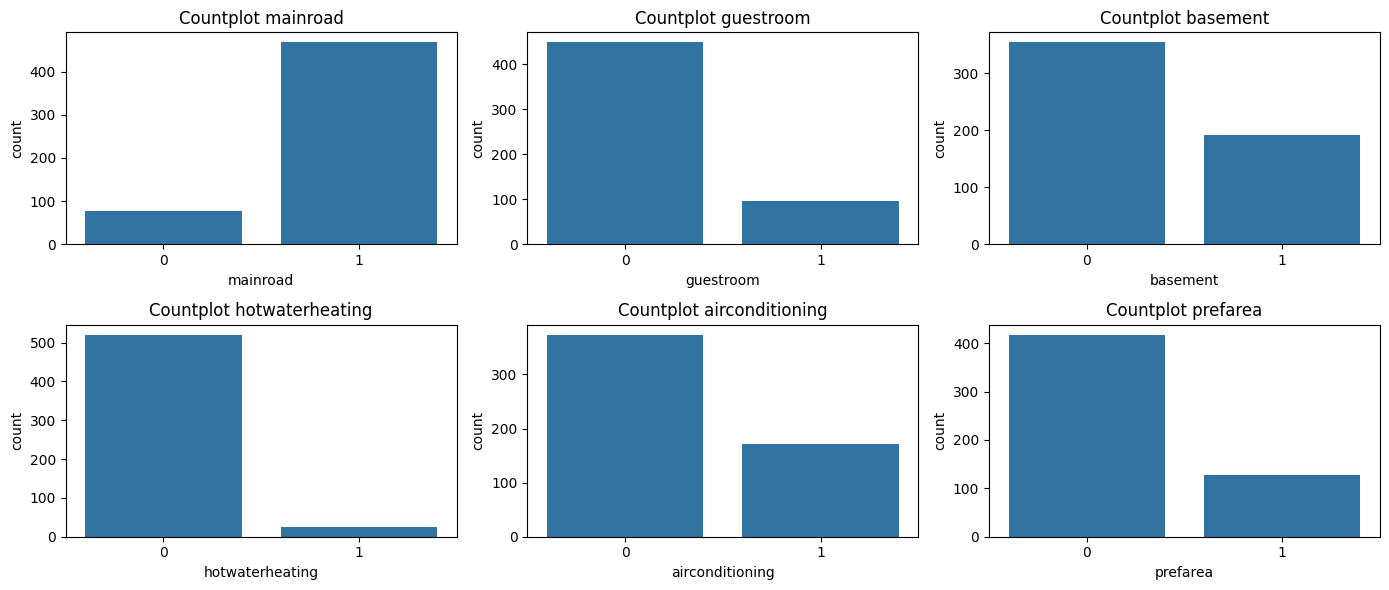

In [127]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
plt.figure(figsize=(14,6))
for i, col in enumerate(binary_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[col])
    plt.title(f'Countplot {col}')
plt.tight_layout()
plt.show()


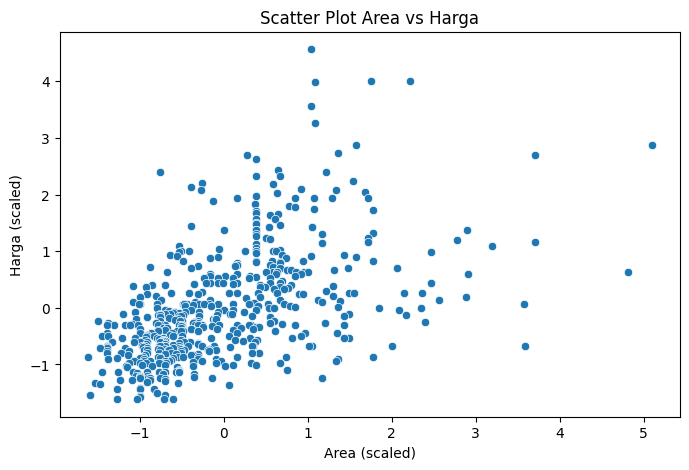

In [128]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['area'], y=df['price'])
plt.title('Scatter Plot Area vs Harga')
plt.xlabel('Area (scaled)')
plt.ylabel('Harga (scaled)')
plt.show()

## Data Preparation

Memisahkan data training dan testing

In [138]:
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']
print(f"Data training: {X_train.shape[0]} baris")

Data training: 436 baris


In [134]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Data testing: {X_test.shape[0]} baris")

Data testing: 109 baris


## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

Model Regresi Linier untuk Prediksi Harga Rumah & Evaluasi Akurasi

In [150]:
features = X_train.columns.tolist()
model = LinearRegression()
model.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

Mean Squared Error (MSE): 0.5074
R-squared (R2): 0.6495


Pengaruh fitur pada kenaikan harga

In [151]:
coef = pd.Series(model.coef_, index=X_train.columns)
print("Pengaruh fitur ke harga rumah:")
print(coef.sort_values(ascending=False))


Pengaruh fitur ke harga rumah:
airconditioning     0.420368
hotwaterheating     0.368102
prefarea            0.337076
bathrooms           0.294726
area                0.273639
basement            0.210390
mainroad            0.196297
stories             0.188403
guestroom           0.124763
parking             0.103991
bedrooms            0.031005
furnishingstatus   -0.112589
dtype: float64


## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

Hapus NaN dari matriks

In [160]:
nan_mask = ~(np.isnan(y_test) | np.isnan(y_pred))
y_test_clean = y_test[nan_mask]
y_pred_clean = y_pred[nan_mask]

Hitung metrik

In [161]:
r2 = r2_score(y_test_clean, y_pred_clean)
mae = mean_absolute_error(y_test_clean, y_pred_clean)
mse = mean_squared_error(y_test_clean, y_pred_clean)
rmse = np.sqrt(mse)

Output

In [162]:
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


R² Score: 0.6495
Mean Absolute Error (MAE): 0.5243
Mean Squared Error (MSE): 0.5074
Root Mean Squared Error (RMSE): 0.7123
